In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import mplfinance as mpf
import talib
from sklearn import tree, ensemble, model_selection, cluster, metrics,preprocessing
from sklearn.feature_extraction import text
from tensorflow import keras
import jieba
from IPython.display import display
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
plt.rcParams['font.family'] = 'Microsoft YaHei'

<div class="jumbotron">
    <p class="display-1 h1">Alpha模型——数据驱动</p>
    <hr class="my-4">
    <p>主讲：李岩</p>
    <p>管理学院</p>
    <p>liyan@cumtb.edu.cn</p>
</div>

# 数据挖掘基础

## 数据挖掘

<dl class="row alert-info">
    <dt class="col-md-3">数据挖掘</dt>
    <dd class="col-md-9">从大量的数据中通过<strong>算法</strong>搜索<strong>隐藏</strong>于其中的信息的过程。</dd>
</dl>

### 挖掘算法分类

<center>
    <img src="./img/dataMining/miningAlgo.png" width=100%>
</center>

### 数据挖掘建模流程

<center><img src="./img/dataMining/miningModelling.png" width=80%></center>

## `scikit-learn`介绍

`scikit-learn`软件包

[https://scikit-learn.org/stable/](https://scikit-learn.org/stable/)

- `scikit-learn`是`Python`的一个开源机器学习模块，它建立在`NumPy`，`SciPy`和`matplotlib`模块之上

- 为用户提供各种机器学习算法接口，可以让用户简单、高效地进行数据挖掘和数据分析

### `sklearn`数据挖掘一般流程

<center><img src="./img/dataMining/sklearnApp.png" width=80%></center>

## 其他数据挖掘模块

- PySpark：针对大数据的数据挖掘与机器学习工具，是`Spark`的`Python`接口

- Apache `Spark`
    + `Spark`：专为大规模数据处理而设计的快速通用的计算引擎

- 官网：[http://spark.apache.org/docs/latest/api/python/index.html](http://spark.apache.org/docs/latest/api/python/index.html)

- 学习链接：[http://codingdict.com/article/8888](http://codingdict.com/article/8888)

- Tensorflow：开源机器学习平台

- 官网：[https://tensorflow.google.cn/](https://tensorflow.google.cn/)

# 分类模型

## 基本概念

### 分类（classification） 

- 给定一条记录$(\boldsymbol{x}, y)$，其中，$y$是分类属性或者目标属性，$\boldsymbol{x}$是该记录预测属性的集合

- 通过学习得到一个**目标函数**（target function）$f$，把每个属性集$\boldsymbol{x}$映射到一个预先定义的**类标签**$y$

$$
y = f(\boldsymbol{x})
$$

- 目标函数也被称作**分类模型**（classification model）

### 建立分类模型的一般方法

<center><img src="./img/dataMining/classificationProcess.png" width=80%></center>

#### 训练集与检验集

- 训练集（training set）：由类标签已知的数据记录组成，用于建立分类模型

- 检验集（test set）：用来检验分类规则的数据记录集合

#### 分类算法

+ k最近邻分类
+ 决策树
+ 朴素贝叶斯分类
+ 逻辑回归
+ 神经网络
+ 支持向量机
+ 随机森林

## 决策树

### 基本概念

<center><img src="./img/dataMining/classificationSample.gv.svg" with=100%></center>

<center><img src="./img/dataMining/decisionTreeC.gv.svg" with=60%></center>

### `sklearn`实现 

#### 建立模型

```python
from sklearn import tree
tree.DecisionTreeClassifier(criterion='gini'）
```
- `criterion`：`str`类型，不纯性的度量，可以是`gini`和`entropy`，默认是`gini`

- 生成的决策树的属性（Attributes）
    + `classes_ `：由类标签构成的数组
    + `n_classes_`：`int`，类别的数量
    + `tree_`：建立的决策树

In [96]:
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

##### **One-Hot Encoding**：将标称属性转换成二元属性

> `DecisionTreeClassifer`只支持数值型预测属性
- 但是对类别标签没有要求

```python
pandas.get_dummies(data, columns=None)
```
- `data`：`Series`类型，或者`DataFrame`类型
- `columns`：列名的`list`类型，数据集中哪些列需要转换，默认是将数据集中所有列进行转换
- 返回值：由二元化的属性构成的`DataFrame`

##### one-hot编码

In [101]:
titX = titDf.iloc[:,:-1]
titY = titDf['Survived']
titX.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,3,male,22.0,1,0,7.2500,S
2,1,female,38.0,1,0,71.2833,C
3,3,female,26.0,0,0,7.9250,S
4,1,female,35.0,1,0,53.1000,S
5,3,male,35.0,0,0,8.0500,S


In [102]:
titXOH = pd.get_dummies(titX,columns=['Sex','Embarked'])
titXOH.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,
1,3,22.0,1,0,7.2500,0,1,0,0,1
2,1,38.0,1,0,71.2833,1,0,1,0,0
3,3,26.0,0,0,7.9250,1,0,0,0,1
4,1,35.0,1,0,53.1000,1,0,0,0,1
5,3,35.0,0,0,8.0500,0,1,0,0,1


### 决策树的剪枝

- 为什么需要剪枝？
    + 生成的决策树过于复杂，对训练集的过度拟合
    + 决策树算法没有考虑数据中存在噪声

- 剪枝方法
    + 先剪枝
    + 后剪枝

#### 先剪枝（Forward-Pruning）

<p class="alert alert-info">提前停止树的构造而对树进行剪枝</p>

- 在决策树到达一定高度的情况下就停止树的生长
- 到达结点的样本个数小于某一个阈值可停止树的生长

#### 后剪枝（Post-Pruning）

<p class="alert alert-danger">构造完整的决策树，然后用叶结点替换那些置信度不够的结点的子树，该叶结点所应标记的类别为被替换的子树中大多数样本所属的类别。</p>

## 用决策树分类收益率

- 问题：如何预测下一个周期收益率是上升还是下降？

### 读入并整理数据

In [6]:
rbd = pd.read_csv('./data/rbcontinuous.csv',parse_dates=True,index_col=0)
rbd.columns = ['Open','High','Low','Close','Volume','OI','Settle']
rbd.head()

,Open,High,Low,Close,Volume,OI,Settle
日期,,,,,,,
2009-03-27,3550,3663,3513,3561,354590,45548,0
2009-03-30,3550,3580,3528,3544,145168,48380,0
2009-03-31,3538,3566,3531,3549,70592,44714,0
2009-04-01,3560,3561,3543,3547,28100,42076,0
2009-04-02,3545,3548,3456,3473,235446,68888,0


### 构建分类标签

- 以日收益率作为分类标签

In [5]:
rbd['ret'] = rbd['Close'].pct_change()
rbd.head()

,Open,High,Low,Close,Volume,OI,Settle,ret
日期,,,,,,,,
2009-03-27,3550,3663,3513,3561,354590,45548,0,NaN
2009-03-30,3550,3580,3528,3544,145168,48380,0,-0.004774
2009-03-31,3538,3566,3531,3549,70592,44714,0,0.001411
2009-04-01,3560,3561,3543,3547,28100,42076,0,-0.000564
2009-04-02,3545,3548,3456,3473,235446,68888,0,-0.020863


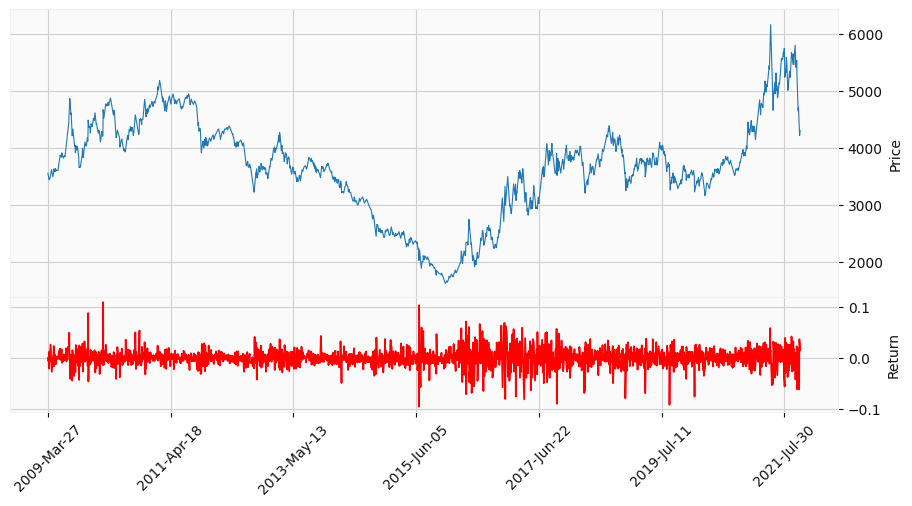

In [6]:
addFig = [mpf.make_addplot(rbd['ret'],panel=1,type='line',color='red',ylabel='Return')]
mpf.plot(rbd,type='line',style='yahoo',addplot=addFig,figratio=(12,6),figscale=1)

In [7]:
rbd['y'] = np.where(rbd['ret'] > 0,1,-1)
rbd.head()

,Open,High,Low,Close,Volume,OI,Settle,ret,y
日期,,,,,,,,,
2009-03-27,3550,3663,3513,3561,354590,45548,0,NaN,-1
2009-03-30,3550,3580,3528,3544,145168,48380,0,-0.004774,-1
2009-03-31,3538,3566,3531,3549,70592,44714,0,0.001411,1
2009-04-01,3560,3561,3543,3547,28100,42076,0,-0.000564,-1
2009-04-02,3545,3548,3456,3473,235446,68888,0,-0.020863,-1


### 构建分类属性（特征）

#### 动量因子

- 商品的超额收益在过去7日内的均值

In [8]:
rbd['mf'] = talib.SMA(rbd['ret'],timeperiod=7)
rbd.head(14)

,Open,High,Low,Close,Volume,OI,Settle,ret,y,mf
日期,,,,,,,,,,
2009-03-27,3550,3663,3513,3561,354590,45548,0,NaN,-1,NaN
2009-03-30,3550,3580,3528,3544,145168,48380,0,-0.004774,-1,NaN
2009-03-31,3538,3566,3531,3549,70592,44714,0,0.001411,1,NaN
2009-04-01,3560,3561,3543,3547,28100,42076,0,-0.000564,-1,NaN
2009-04-02,3545,3548,3456,3473,235446,68888,0,-0.020863,-1,NaN
2009-04-03,3481,3481,3436,3448,152376,75038,0,-0.007198,-1,NaN
2009-04-07,3410,3518,3410,3491,242578,100482,0,0.012471,1,NaN
2009-04-08,3480,3491,3456,3463,147288,91910,0,-0.008021,-1,-0.003934
2009-04-09,3476,3486,3460,3468,87688,94832,0,0.001444,1,-0.003046


#### 波动率因子

- 因子构成：变异系数
\begin{align}
  &\frac{\sigma^2}{|\mu|}\\
  &\sigma^2=\frac{1}{D-1}\sum_{d=1}^D(r_{d,Front}-\mu)^2\\
  &\mu = \frac{1}{D}\sum_{d=1}^Dr_{d,Front}
\end{align}

In [9]:
retMu7 = talib.SMA(rbd['ret'],timeperiod=7)
retVar7 = talib.VAR(rbd['ret'],timeperiod=7)
rbd['vola'] = retVar7/np.abs(retMu7)
rbd.head(14)

,Open,High,Low,Close,Volume,OI,Settle,ret,y,mf,vola
日期,,,,,,,,,,,
2009-03-27,3550,3663,3513,3561,354590,45548,0,NaN,-1,NaN,NaN
2009-03-30,3550,3580,3528,3544,145168,48380,0,-0.004774,-1,NaN,NaN
2009-03-31,3538,3566,3531,3549,70592,44714,0,0.001411,1,NaN,NaN
2009-04-01,3560,3561,3543,3547,28100,42076,0,-0.000564,-1,NaN,NaN
2009-04-02,3545,3548,3456,3473,235446,68888,0,-0.020863,-1,NaN,NaN
2009-04-03,3481,3481,3436,3448,152376,75038,0,-0.007198,-1,NaN,NaN
2009-04-07,3410,3518,3410,3491,242578,100482,0,0.012471,1,NaN,NaN
2009-04-08,3480,3491,3456,3463,147288,91910,0,-0.008021,-1,-0.003934,0.022649
2009-04-09,3476,3486,3460,3468,87688,94832,0,0.001444,1,-0.003046,0.030319


#### 价值因子

- 因子构成

\begin{equation}
  \ln\frac{\frac{1}{D}\sum_{d=1}^D f_{d,Front}}{f_{t,Front}}
\end{equation}

In [10]:
closeMu7 = talib.SMA(rbd['Close'],timeperiod=7)
rbd['val'] = np.log(closeMu7/rbd['Close'])
rbd.head(14)

,Open,High,Low,Close,Volume,OI,Settle,ret,y,mf,vola,val
日期,,,,,,,,,,,,
2009-03-27,3550,3663,3513,3561,354590,45548,0,NaN,-1,NaN,NaN,NaN
2009-03-30,3550,3580,3528,3544,145168,48380,0,-0.004774,-1,NaN,NaN,NaN
2009-03-31,3538,3566,3531,3549,70592,44714,0,0.001411,1,NaN,NaN,NaN
2009-04-01,3560,3561,3543,3547,28100,42076,0,-0.000564,-1,NaN,NaN,NaN
2009-04-02,3545,3548,3456,3473,235446,68888,0,-0.020863,-1,NaN,NaN,NaN
2009-04-03,3481,3481,3436,3448,152376,75038,0,-0.007198,-1,NaN,NaN,NaN
2009-04-07,3410,3518,3410,3491,242578,100482,0,0.012471,1,NaN,NaN,0.007176
2009-04-08,3480,3491,3456,3463,147288,91910,0,-0.008021,-1,-0.003934,0.022649,0.011240
2009-04-09,3476,3486,3460,3468,87688,94832,0,0.001444,1,-0.003046,0.030319,0.006692


#### 删除含有缺失值的行

In [11]:
rbd.dropna(inplace=True)
rbd.head()

,Open,High,Low,Close,Volume,OI,Settle,ret,y,mf,vola,val
日期,,,,,,,,,,,,
2009-04-08,3480,3491,3456,3463,147288,91910,0,-0.008021,-1,-0.003934,0.022649,0.011240
2009-04-09,3476,3486,3460,3468,87688,94832,0,0.001444,1,-0.003046,0.030319,0.006692
2009-04-10,3483,3499,3470,3484,120978,100164,0,0.004614,1,-0.002588,0.037740,-0.000574
2009-04-13,3485,3493,3464,3469,109820,109430,0,-0.004305,-1,-0.003123,0.031135,0.000535
2009-04-14,3475,3600,3469,3560,540646,150640,0,0.026232,1,0.003605,0.036088,-0.021785


### 构建决策树模型

#### 划分训练集与检验集

In [14]:
rbdTrain,rbdTest = train_test_split(rbd,test_size=0.25,random_state=10)
rbdTrain.head()
rbdTest.head()

,Open,High,Low,Close,Volume,OI,Settle,ret,y,mf,vola,val
日期,,,,,,,,,,,,
2010-07-22,4183,4191,4163,4173,1789800,913076,4174,-0.000958,-1,0.003080,0.019828,-0.012089
2020-04-21,3350,3351,3306,3337,1529213,1527245,3326,-0.007436,-1,-0.001524,0.010619,0.010646
2011-12-23,4208,4231,4201,4226,730982,682206,4215,0.004755,1,0.002516,0.019037,-0.010569
2018-02-27,4038,4040,3981,4035,2380880,2509598,4014,0.001738,1,0.005130,0.028545,-0.021255
2015-10-27,1800,1818,1798,1804,2068660,2087966,1806,0.001666,1,-0.002031,0.010611,-0.000396


,Open,High,Low,Close,Volume,OI,Settle,ret,y,mf,vola,val
日期,,,,,,,,,,,,
2020-10-19,3636,3664,3591,3611,1300997,1162179,3627,-0.005782,-1,0.002068,0.032636,0.003712
2014-06-27,3115,3122,3086,3088,1650400,1653300,3106,-0.008668,-1,0.003735,0.013954,-0.006731
2013-07-23,3676,3692,3673,3688,1597738,1452482,3685,0.002719,1,0.001249,0.004596,-0.002288
2016-04-22,2735,2740,2591,2619,21928680,2671432,2652,-0.047636,-1,0.016087,0.083452,-0.048218
2012-03-05,4295,4309,4251,4267,669090,551168,4272,-0.007213,-1,0.000989,0.029782,0.002641


#### 构建并训练决策树

In [15]:
rbdTree = tree.DecisionTreeClassifier()

In [16]:
rbdTree.fit(rbdTrain.loc[:,['mf','vola','val']],rbdTrain['y'])

DecisionTreeClassifier()

In [17]:
rbdTree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

#### 训练集分类效果检验

In [18]:
rbdTrainYPre = rbdTree.predict(rbdTrain.loc[:,['mf','vola','val']])

##### 混淆矩阵（confusion matrix）

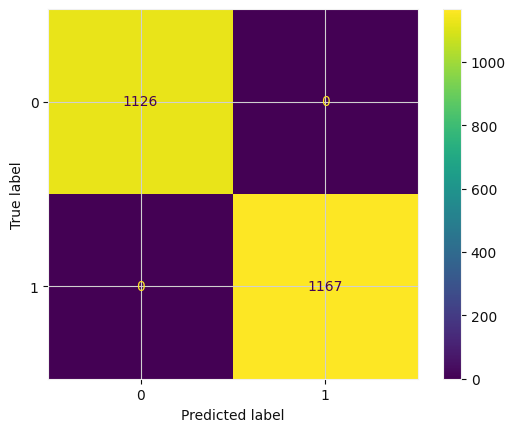

In [38]:
confusionMatrix=metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(rbdTrain['y'],rbdTrainYPre))
confusionMatrix.plot()

In [19]:
resTrain = metrics.classification_report(rbdTrain['y'],rbdTrainYPre)
print(resTrain)

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00      1126
           1       1.00      1.00      1.00      1167

    accuracy                           1.00      2293
   macro avg       1.00      1.00      1.00      2293
weighted avg       1.00      1.00      1.00      2293



#### 检验集分类效果检验

In [20]:
rbdTestYPre = rbdTree.predict(rbdTest.loc[:,['mf','vola','val']])

In [21]:
resTest = metrics.classification_report(rbdTest['y'],rbdTestYPre)
print(resTest)

              precision    recall  f1-score   support

          -1       0.60      0.60      0.60       386
           1       0.59      0.59      0.59       379

    accuracy                           0.60       765
   macro avg       0.60      0.60      0.60       765
weighted avg       0.60      0.60      0.60       765



### 显示决策树

<Figure size 1200x600 with 0 Axes>

[Text(447.7464358060083, 453.75, 'X[2] <= -0.0\ngini = 0.5\nsamples = 2293\nvalue = [1126, 1167]'),
 Text(168.76787279662622, 437.25, 'X[2] <= -0.021\ngini = 0.413\nsamples = 1189\nvalue = [347, 842]'),
 Text(24.91281273692191, 420.75, 'X[2] <= -0.033\ngini = 0.193\nsamples = 277\nvalue = [30, 247]'),
 Text(7.520849128127369, 404.25, 'X[2] <= -0.036\ngini = 0.073\nsamples = 106\nvalue = [4, 102]'),
 Text(3.7604245640636846, 387.75, 'X[0] <= 0.013\ngini = 0.048\nsamples = 81\nvalue = [2, 79]'),
 Text(1.8802122820318423, 371.25, 'gini = 0.0\nsamples = 52\nvalue = [0, 52]'),
 Text(5.640636846095527, 371.25, 'X[0] <= 0.013\ngini = 0.128\nsamples = 29\nvalue = [2, 27]'),
 Text(3.7604245640636846, 354.75, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(7.520849128127369, 354.75, 'X[2] <= -0.043\ngini = 0.069\nsamples = 28\nvalue = [1, 27]'),
 Text(5.640636846095527, 338.25, 'gini = 0.0\nsamples = 25\nvalue = [0, 25]'),
 Text(9.401061410159212, 338.25, 'X[2] <= -0.041\ngini = 0.444\nsamples

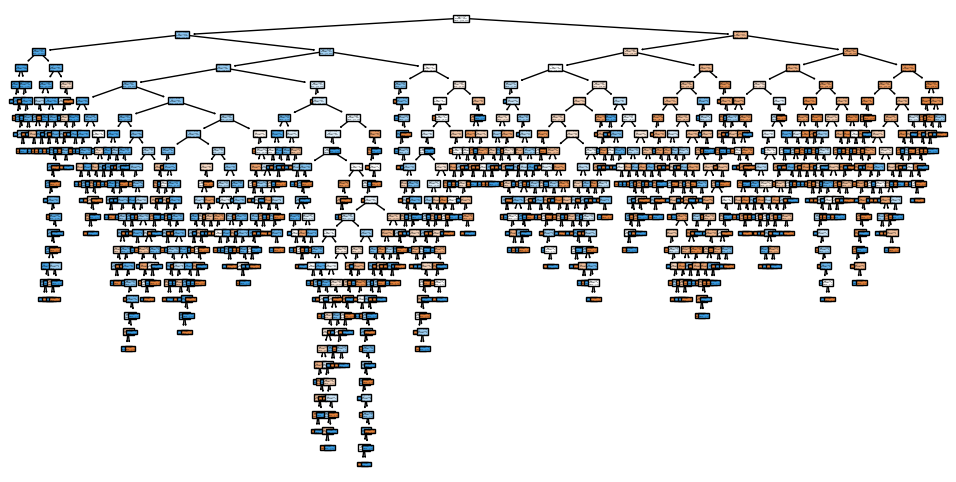

In [22]:
plt.figure(figsize=(12,6))
tree.plot_tree(rbdTree,filled=True)

## 集成学习

<dl class="row alert-danger">
    <dt class="col-md-3">集成学习（ensemble learning）</dt>
    <dd class="col-md-9">通过构建并结合多个分类器来完成学习任务。</dd>
</dl>

- 典型方法
    - 装袋算法（bagging）与随机森林（random forest）
    - 提升算法（boosting）

### boosting算法

- 将弱分类器提升为强分类器的算法

- 通过顺次迭代的方式生成最终的分类器

- 基本思想

1. 初始化，令残差等于当前的类标签，即$r_i=y_i, i=1,2,\cdots,n$

2. 设置需要生成的分类器的数量，$B$，对于每一个$b\in B$进行如下操作：
    1. 在训练集上生成第$b$个分类器$\hat{f}_b(\boldsymbol{\rm x})$;
    
    2. 更新类标签（残差），$r_i=r_i-\alpha_b\hat{f}_b(\boldsymbol{\rm x})$

3. 将单个分类器叠加得到最终的分类器
$$
    \hat{f}(\boldsymbol{\rm x})=\sum_{b=1}^B\alpha_b\hat{f}_b(\boldsymbol{\rm x})
$$

- 原理：每个新的分类器都是在上次分类的残差上拟合，使得最终的分类器能够对单个分类器分类较差的区域给予改进

- 常用的提升算法
    - AdaBoost
    - xgboost
    - LogitBoost

## 随机森林（Random Forest）

### 装袋

<dl class="row alert-info">
    <dt class="col-md-3">自助法（bootstraping）</dt>
    <dd class="col-md-9">有放回的随机采样方法。</dd>
</dl>

- 解决金融交易中只有一条历史样本数据的问题

- 原理：如果$N$个独立同分布（$iid$）的样本，每个样本的方差为$\sigma^2$，那么样本均值的方差为$\frac{\sigma^2}{N}$

- 装袋过程
    1. 通过自助采样，生成$B$个样本；
    2. 在每个样本上训练一个分类器$\hat{f}_b(\boldsymbol{\rm x})$；
    3. 将各个分类器合成得到最终分类器
    $$
        \hat{f}_{\text{avg}}(\boldsymbol{\rm x})=\frac{1}{B}\sum_{b=1}^B\hat{f}_b(\boldsymbol{\rm x})
    $$

### 随机森林

- 特征装袋（feature bagging），降低不同决策树之间的相关性

- 组合多个决策树，通过投票的方式确定样本所属的类别，使得整体模型在抑止过度拟合的同时，获得较好的精确度

<center><img src="./img/dataMining/randomForest.jpg" width=100%></center>

### 建立随机森林模型

```python
from sklearn import ensemble
ensemble.RandomForestClassifier()
```

In [23]:
rbRandTree = ensemble.RandomForestClassifier(random_state=10)

In [24]:
rbRandTree.fit(rbdTrain.loc[:,['mf','vola','val']],rbdTrain['y'])

RandomForestClassifier(random_state=10)

In [25]:
rbRandTree.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 10,
 'verbose': 0,
 'warm_start': False}

### 训练集分类效果检验

In [26]:
rbRandTrainYPre = rbRandTree.predict(rbdTrain.loc[:,['mf','vola','val']])

In [27]:
resRandTrain = metrics.classification_report(rbdTrain['y'],rbRandTrainYPre)
print(resRandTrain)

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00      1126
           1       1.00      1.00      1.00      1167

    accuracy                           1.00      2293
   macro avg       1.00      1.00      1.00      2293
weighted avg       1.00      1.00      1.00      2293



### 检验集分类效果检验

In [28]:
rbRandTestYPre = rbRandTree.predict(rbdTest.loc[:,['mf','vola','val']])

In [29]:
resRandTest = metrics.classification_report(rbdTest['y'],rbRandTestYPre)
print(resRandTest)

              precision    recall  f1-score   support

          -1       0.67      0.66      0.67       386
           1       0.66      0.68      0.67       379

    accuracy                           0.67       765
   macro avg       0.67      0.67      0.67       765
weighted avg       0.67      0.67      0.67       765



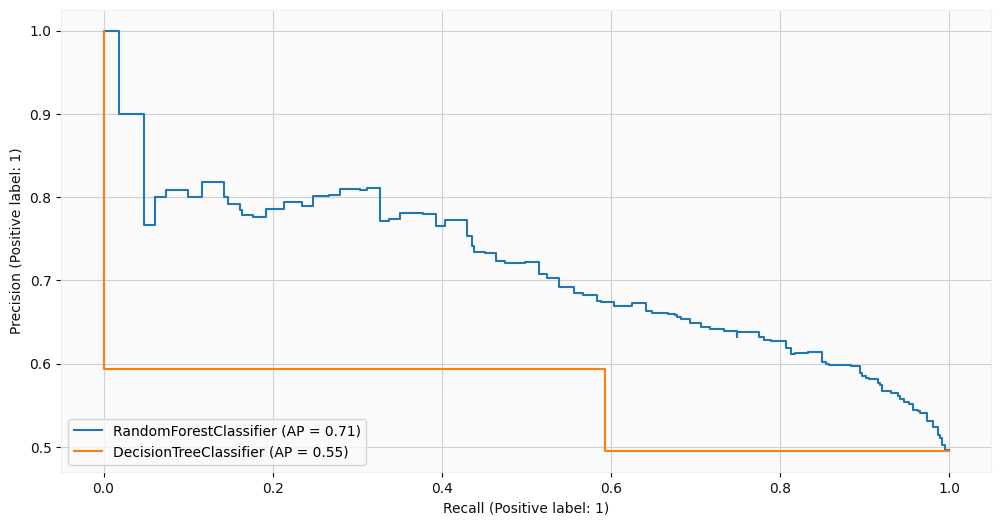

In [36]:
fig,ax = plt.subplots(figsize=(12,6))
metrics.plot_precision_recall_curve(rbRandTree,rbdTest.loc[:,['mf','vola','val']],rbdTest['y'],ax=ax)
metrics.plot_precision_recall_curve(rbdTree,rbdTest.loc[:,['mf','vola','val']],rbdTest['y'],ax=ax)

In [31]:
trainScores = model_selection.cross_val_score(rbRandTree,rbd.loc[:,['mf','vola','val']],rbd['y'],cv=5)
trainScores

array([0.65359477, 0.65849673, 0.67156863, 0.69558101, 0.67430442])

In [286]:
trainScores.mean()

0.6876618401899945

# 时间序列价格预测

## 循环神经网络（recurrent neural network）

<center><img src="./img/dataMining/ffwVsRnn.png" width=100%></center>

### 循环神经网络展开

<center><img src="./img/dataMining/singleLayerRnn.png" width=100%></center>

### 计算各层输出

<center><img src="./img/dataMining/rnnWeightCompute.png" width=100%></center>

### 计算权重

- 令$L^t$为周期$t$的损失，由于$L^t$依赖于从1到$t$周期的隐藏层输出，则利用反向传播算法可得

$$
\frac{\partial L^t}{\partial W_{hh}}=\frac{\partial L^t}{\partial y^t}\times\frac{\partial y^t}{\partial h^t}\times\left(\sum_{k=1}^t\frac{\partial h^t}{\partial h^k}\times\frac{\partial h^k}{\partial W_{hh}}\right)
$$

- 其中
$$
\frac{\partial h^t}{\partial h^k}=\Pi_{i=k+1}^t\frac{\partial h^i}{\partial h^{i-1}}
$$

- 梯度消失或爆炸
    - 由上式的梯度相乘导致

## 长短期记忆模型

- 长短期记忆（Long short-term memory, LSTM）:一种循环神经网络
- 可以抑制梯度消失或爆炸问题

### 基本结构：记忆单元

<center><img src="./img/dataMining/memoryCell.png" width=100%></center>

- $X^t$：周期$t$的输入
- $h^t$：隐藏层神经元在周期$t$的输出
- $C^t$：该记忆单元在周期$t$的状态，$C^{t-1}$到$C^t$的权重为1，防止梯度消失或爆炸

#### 门单元

<center><img src="./img/dataMining/gate.png" width=30%></center>

- sigmoid激活函数之后接着点乘运算

#### 三个门单元 

<center><img src="./img/dataMining/threeGates.png" width=100%></center>

- 遗忘门（forget gate）
    - 控制哪些记忆单元状态信息会保留，哪些会去除
    
$$
f^t = \sigma(W_{xf}x^t+W_{hf}h^{t-1}+b_f)
$$

- 输入门（input gate）
    - 控制哪些新信息会被增加到记忆单元状态
    
$$
i^t = \sigma(W_{xi}x^t+W_{hi}h^{t-1}+b_i)
$$

$$
g^t=\tanh(W_{xg}x^t+W_{hg}h^{t-1}+b_g)
$$

- 输出门（output gate）
    - 控制隐藏层神经元的输出
    
$$
o^t = \sigma(W_{xo}x^t+W_{ho}h^{t-1}+b_o)
$$

- 记忆单元状态更新

$$
C^t = (C^{t-1}\odot f^t)\oplus(i^t\odot g^t)
$$

- 隐藏神经元输出

$$
h^t = o^t\odot\tanh(C^t)
$$

#### 单层LSTM

<center><img src="./img/dataMining/oneLayerLstm.png" width=100%></center>

#### 多层LSTM

<center><img src="./img/dataMining/multiLayerLstm.png" width=100%></center>

## 数据预处理

In [42]:
rbd.shape

(3065, 7)

### 划分训练集与检验集

In [44]:
# rbdCloseTrain,rbdCloseTest = model_selection.train_test_split(rbd['Close'],random_state=10)
rbdCloseTrain,rbdCloseTest =rbd['Close'].iloc[:2000],rbd['Close'].iloc[2000:]

### 标准化数据

In [45]:
scaler = preprocessing.MinMaxScaler()
scaled_rbdCloseTrain = scaler.fit_transform(rbdCloseTrain.values.reshape(-1,1))

### 构建训练数据

In [46]:
x_train = []
y_train = []
windowSize=20
for i in range(windowSize, len(scaled_rbdCloseTrain)):
    x_train.append(scaled_rbdCloseTrain[i-windowSize:i, 0])
    y_train.append(scaled_rbdCloseTrain[i, 0])

In [47]:
x_train = np.array(x_train).reshape(-1,windowSize,1) # 变换维度

In [48]:
y_train = np.array(y_train)

## 建立LSTM模型

In [49]:
lstModel = keras.Sequential()
lstModel.add(keras.layers.LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
lstModel.add(keras.layers.LSTM(50, return_sequences= True))
lstModel.add(keras.layers.LSTM(50, return_sequences= False))
lstModel.add(keras.layers.Dense(25))
lstModel.add(keras.layers.Dense(1))

In [50]:
lstModel.compile(optimizer='adam', loss='mean_squared_error') # 设定优化算法与损失函数

In [57]:
lstModel.fit(x_train,y_train,batch_size=1,epochs=5)

Epoch 1/5
1980/1980 [==============================] - 31s 16ms/step - loss: 0.0013
Epoch 2/5
1980/1980 [==============================] - 31s 16ms/step - loss: 6.4458e-04
Epoch 3/5
1980/1980 [==============================] - 31s 16ms/step - loss: 5.0932e-04
Epoch 4/5
1980/1980 [==============================] - 31s 16ms/step - loss: 5.6188e-04
Epoch 5/5
1980/1980 [==============================] - 31s 16ms/step - loss: 4.5344e-04


## 在检验集上预测

In [58]:
scaled_rbdCloseTest = scaler.fit_transform(rbdCloseTest.values.reshape(-1,1))  #标准化检验集数据

### 构建检验数据

In [59]:
x_test=[]
for i in range(windowSize,len(scaled_rbdCloseTest)):
    x_test.append(scaled_rbdCloseTest[i-windowSize:i,0])
x_test=np.array(x_test).reshape(-1,windowSize,1)

### 预测

In [60]:
predRes = lstModel.predict(x_test)
predRes = scaler.inverse_transform(predRes)  # 反变化为正常范围数据

### 绘制真实价格与预测价格

In [61]:
testRealPrice = scaler.inverse_transform(scaled_rbdCloseTest)
resDf = pd.DataFrame({'real':testRealPrice[20:].flatten(),'pred':predRes.flatten()},index=range(predRes.shape[0]))
resDf.head()

,real,pred
0,3496.0,3629.925781
1,3525.0,3495.498047
2,3516.0,3480.800537
3,3568.0,3475.462402
4,3568.0,3518.337402


[Text(0.5, 0, '样本点'), Text(0, 0.5, '螺纹钢价格(元/顿)')]

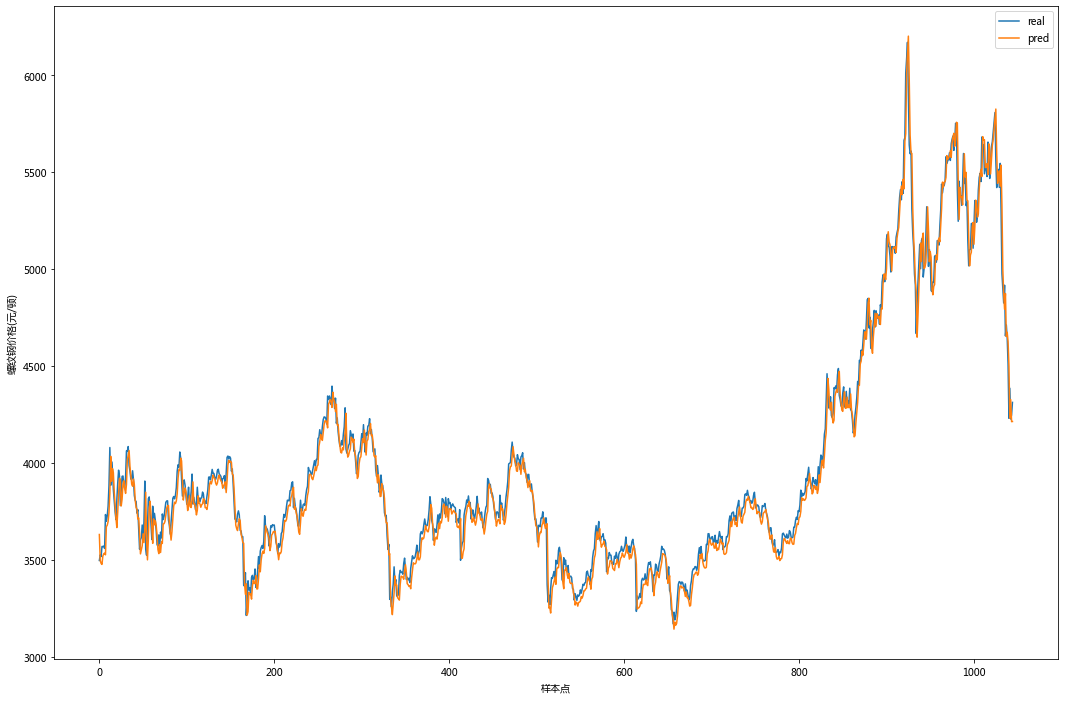

In [72]:
ax = resDf.plot(kind='line',figsize=(18,12))
ax.set(xlabel='样本点',ylabel='螺纹钢价格(元/顿)')

## 参考文献

- BANIK S, SHARMA N, MANGLA M, 等. 2022. LSTM based decision support system for swing trading in stock market[J/OL]. Knowledge-Based Systems, 239: 107994. https://doi.org/10.1016/j.knosys.2021.107994.

# 强化学习模型

## 基本概念与术语

- Reinformcement Learning

<center><img src="./img/dataMining/RLLoop.png" width=80%></center>

### 状态与观测

- 状态$s_t$：对系统状态的完整描述
- 观测$o_t$：对状态$s_t$的部分描述

### 策略

- 策略（policy）：agent使用的规则，决定在什么状态采取什么行动$a_t$

- 策略类型
    - 确定性策略：$a_t=\mu_{\theta}(s_t)$，$\theta$表示策略依赖的参数
    - 随机性策略：$a_t\sim\pi_{\theta}(\cdot|s_t)$，$\sim$表示从前项为后项的采样

### 轨迹

- 轨迹（trajectory或episode）：由状态与行动构成的序列
    - $\tau=(s_0,a_0,s_1,a_1,\cdots)$

- 状态转移：从$s_t$到$s_{t+1}$由环境与最近的行动决定
    - 确定性转移：$s_{t+1}=f(s_t,a_t)$
    - 随机性转移：$s_{t+1}\sim P(\cdot|s_t,a_t)$

### 回报与收益

- 回报（reward）：每周期的收益，取决于状态$s_t$，行动$a_t$，与下一个到达的状态$s_{t+1}$，
    - $r_t = R(s_t,a_t,s_{t+1})$

- 给定轨迹$\tau$的累积回报，即收益（return）

$$
R(\tau)=\sum_{t=0}^{\infty}\gamma^tr_t
$$

其中，$\gamma$为贴现率

## 强化学习的目标

- agent选择策略最大化期望收益（expected return）

- 假设状态转移和策略均随机，则一个$T$步的轨迹的概率是

$$
P(\tau|\pi)=\rho_0(s_0)\Pi_{t=0}^{T-1}P(s_{t+1}|s_t,a_t)\pi(a_t|s_t)
$$

其中，$\rho(\cdot)$是初始状态的分布函数

- 期望收益$J(\pi)$为，

$$
J(\pi)=\int_{\tau}P(\tau|\pi)R(\tau)=\underset{\tau\sim\pi}{\rm E}[R(\tau)]
$$

- 强化学习优化目标为找到最优策略$\pi^*$，使得

$$
\pi^* = \arg\underset{\pi}{\max} J(\pi)
$$

## 价值函数（value function）

- 状态（状态-行动）的价值：从指定状态（状态-行动）开始，之后一直按照某个策略行动，能够得到的期望收益

- On-Policy Value function：从状态$s$开始始终按照策略$\pi$行动能够得到的期望收益，记为$V^{\pi}(s)$

$$
V^{\pi}(s) = \underset{\tau\sim\pi}{\rm E}[R(\tau)|s_0=s]
$$

- On-Policy Action-Value function：从状态$s$开始，采取任意行动$a$，之后使用按照策略$\pi$行动得到的期望收益，记为$Q^{\pi}(s,a)$

$$
Q^{\pi}(s,a)=\underset{\tau\sim\pi}{\rm E}[R(\tau)|s_0=s,a_0=a]
$$

- 上述两个价值函数的关系

$$
V^{\pi}(s)=\underset{a\sim\pi}{\rm E}[Q^{\pi}(s,a)]
$$

- The Optimal Value function：从状态$s$开始，之后使用按照最优策略行动得到的期望收益，记为$V^*(s)$

$$
V^*(s) = \underset{\pi}{\max}\underset{\tau\sim\pi}{\rm E}[R(\tau)|s_0=s]
$$

- The Optimal Action-Value function：从状态$s$开始，采取任意行动$a$，之后使用按照最优策略行动得到的期望收益，记为$Q^*(s,a)$

$$
Q^*(s,a)=\underset{\pi}{\max}\underset{\tau\sim\pi}{\rm E}[R(\tau)|s_0=s,a_0=a]
$$

- 上述两个价值函数的关系

$$
V^*(s) = \underset{a}{\max}Q^*(s,a)
$$

## Bellman equations

- Bellman equations for on-policy value function

$$
V^{\pi}(s) = \underset{a\sim\pi\\s'\sim P}{\rm E}[r(s,a)+\gamma V^{\pi}(s')]
$$


$$
Q^{\pi}(s,a) = \underset{s'\sim P}{\rm E}\left[r(s,a)+\gamma\underset{a'\sim\pi}{\rm E}[Q^{\pi}(s',a')]\right]
$$

- Bellman equations for optimal value function

$$
V^{*}(s) = \underset{a}{\max}\underset{s'\sim P}{\rm E}[r(s,a)+\gamma V^{*}(s')]
$$

$$
Q^{*}(s,a) = \underset{s'\sim P}{\rm E}\left[r(s,a)+\gamma\underset{a'}{\max} Q^{*}(s',a')\right]
$$

## 时序差分

- Temporal Difference

- 给定策略$\pi$，估计它的价值函数$V^{\pi}$

$$
V^{\pi}(s_t) \gets V^{\pi}(s_t)+\alpha\left[r_{t+1}+\gamma V^{\pi}(s_{t+1})-V^{\pi}(s_t)\right]
$$

- 迭代算法

<center><img src="./img/dataMining/TD0.png" width=100%></center>

### TD for action-value pair

- On-policy TD

$$
Q(s_t,a_t)\gets Q(s_t,a_t)+\alpha\left[r_{t+1}+\gamma Q(s_{t+1,a_{t+1}})-Q(s_t,a_t)\right]
$$

<center><img src="./img/dataMining/sarsa.png" width=100%></center>

- Off-policy TD

$$
Q(s_t,a_t)\gets Q(s_t,a_t)+\alpha\left[r_{t+1}+\gamma\underset{a}{\max} Q(s_{t+1},a)-Q(s_t,a_t)\right]
$$

<center><img src="./img/dataMining/q-learning.png" width=100%></center>

## 强化学习算法

<center><img src="./img/dataMining/RLAlgos.png" width=100%></center>

## 强化学习模型用于金融交易

<center><img src="./img/dataMining/tradingRL.png" width=80%></center>

# 聚类模型

## 基本概念

<dl class="row alert-info">
    <dt class="col-md-2">聚类</dt>
    <dd class="col-md-10">是一种将特征相似的样本聚集到一起，从而达到区分具有不同特征的样本的目的无监督的算法</dd>
</dl>

- 不需要事先知道类别信息

- 聚类形成的每一个组，被称为**簇（cluster）**

- 聚类的目标：簇内的样本之间尽可能相似，不同簇的样本尽可能不同

<img src="./img/dataMining/clustering.png" width=50%>

## K均值

- 基于划分的聚类，发现指定个数（$K$）的簇

- 基本思想：利用样本之间的距离衡量样本之间的相似性，用一组样本的质心（该组样本的均值）作为簇的中心，找到紧凑且独立的簇

- 簇之间彼此**互斥**，即每个样本**只能**分属于一个簇

### 基本算法

<center><img src='./img/dataMining/kmago.svg' width=80%></center>

##### $K$均值聚类过程示例

<center><img src="./img/dataMining/kmeansProcess.gif" width=100%></center>

#### 距离的度量

- 欧式空间：欧几里得距离，$n$维空间中两个点$\boldsymbol{x}$和$\boldsymbol{y}$之间的欧几里得距离是:
$$
d(\boldsymbol{x}, \boldsymbol{y}) = \sqrt{\sum_{k=1}^n(x_k-y_k)^2}
$$

#### 目标函数

- 目标函数为每个点到最近质心的欧几里得距离的**误差平方和**（sum of the squared error, SSE）最小

$$
\begin{split}
SSE &= \sum_{i=1}^K\sum_{\boldsymbol{x}\in C_i}d(\boldsymbol{c}_i, \boldsymbol{x})^2\\
\boldsymbol{c}_i&=\frac{1}{m_i}\sum_{\boldsymbol{x}\in C_i}\boldsymbol{x}
\end{split}
$$
其中，$\boldsymbol{x}$是数据点，$C_i$是第$i$个簇，$c_i$是第$i$个簇的质心，$m_i$是第$i$个簇包含的数据点的个数，$K$是簇的个数

- 簇内的误差平方和（SSE）也被称作cluster inertia

### $K$均值的`Python`实现

```python
from sklearn.cluster import KMeans
KMeans(n_clusters=8, init=’k-means++’, max_iter=300, random_state=None, n_jobs=None)
```
- `n_clusters`：`int`类型，簇的个数
- `init`：初始质心的方法，可以选择`k-means++`或`random`
- `max_iter`：最大迭代次数
- `random_state`：初始质心的随机生成种子
- `n_jobs`：用多少个CPU运行

#### 选择$K$值

> 随着$K$值的增大，簇内误差平方和（SSE）会降低

<dl class="row alert-info">
    <dt class="col-xl-4">肘部(elbow)法则<dt>
    <dd class="col-xl-8">识别SSE<strong>开始快速增大</strong>处的$K$值</dd>
</dl>

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=1, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=9, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

[[Text(0, 0, '1'),
  Text(0, 0, '2'),
  Text(0, 0, '3'),
  Text(0, 0, '4'),
  Text(0, 0, '5'),
  Text(0, 0, '6'),
  Text(0, 0, '7'),
  Text(0, 0, '8'),
  Text(0, 0, '9'),
  Text(0, 0, '10')]]

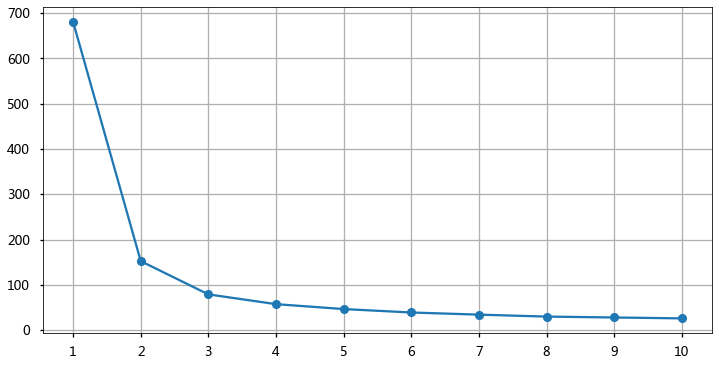

In [12]:
sse = []                ###记录每个k值对应的SSE
for k in range(1,11):
    km = KMeans(n_clusters=k,random_state=0,n_jobs=-1)
    km.fit(irisX)
    sse.append(km.inertia_)
ax = pd.Series(sse).plot(kind='line',figsize=(12,6),marker='o',grid=True,xticks=range(0,10))   #xticks：在哪些位置显示x轴刻度标签
ax.set(xticklabels=range(1,11))        # 改变x轴标签显示，默认是从0开始

- 当$K=3$的时候，SSE**开始快速增大**，所以选择3个簇

## 聚类ohlc数据

- 问题：识别市场状态（market regimes），趋势还是震荡？

### 读入数据

In [79]:
rbBar = pd.read_csv('./data/models/rbChangeContract.csv')
rbBar.head()
rbBar.shape

,Date,Open,High,Low,Close
0,2019-12-05 14:15:00,3423.0,3427.0,3422.0,3426.0
1,2019-12-05 14:16:00,3426.0,3428.0,3424.0,3427.0
2,2019-12-05 14:17:00,3428.0,3428.0,3426.0,3426.0
3,2019-12-05 14:18:00,3426.0,3427.0,3425.0,3427.0
4,2019-12-05 14:19:00,3427.0,3428.0,3426.0,3427.0


(54314, 5)

In [80]:
rbBar['Date'] = pd.to_datetime(rbBar['Date'],format='%Y-%m-%d %H:%M:%S')
rbBar.set_index('Date',inplace=True)
rbBar.head()

,Open,High,Low,Close
Date,,,,
2019-12-05 14:15:00,3423.0,3427.0,3422.0,3426.0
2019-12-05 14:16:00,3426.0,3428.0,3424.0,3427.0
2019-12-05 14:17:00,3428.0,3428.0,3426.0,3426.0
2019-12-05 14:18:00,3426.0,3427.0,3425.0,3427.0
2019-12-05 14:19:00,3427.0,3428.0,3426.0,3427.0


### 归一化数据

- 目的：使得各交易时段的数据可比

- 以每个交易时段内的开盘价作为基准

In [81]:
rbBar['HO'] = rbBar['High']/rbBar['Open']
rbBar['LO'] = rbBar['Low']/rbBar['Open']
rbBar['CO'] = rbBar['Close']/rbBar['Open']
rbBar.head()

,Open,High,Low,Close,HO,LO,CO
Date,,,,,,,
2019-12-05 14:15:00,3423.0,3427.0,3422.0,3426.0,1.001169,0.999708,1.000876
2019-12-05 14:16:00,3426.0,3428.0,3424.0,3427.0,1.000584,0.999416,1.000292
2019-12-05 14:17:00,3428.0,3428.0,3426.0,3426.0,1.000000,0.999417,0.999417
2019-12-05 14:18:00,3426.0,3427.0,3425.0,3427.0,1.000292,0.999708,1.000292
2019-12-05 14:19:00,3427.0,3428.0,3426.0,3427.0,1.000292,0.999708,1.000000


In [83]:
rbCluster = rbBar.loc[:,['HO','LO','CO']]
rbCluster.head()

,HO,LO,CO
Date,,,
2019-12-05 14:15:00,1.001169,0.999708,1.000876
2019-12-05 14:16:00,1.000584,0.999416,1.000292
2019-12-05 14:17:00,1.000000,0.999417,0.999417
2019-12-05 14:18:00,1.000292,0.999708,1.000292
2019-12-05 14:19:00,1.000292,0.999708,1.000000


### 选择`k`值

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=1, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=10, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=10, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=10, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=10, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=10, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=10, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=10, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=10, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=9, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=10, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=10, tol=0.0001, verbose=0)

[[Text(0, 0, '1'),
  Text(0, 0, '2'),
  Text(0, 0, '3'),
  Text(0, 0, '4'),
  Text(0, 0, '5'),
  Text(0, 0, '6'),
  Text(0, 0, '7'),
  Text(0, 0, '8'),
  Text(0, 0, '9'),
  Text(0, 0, '10')]]

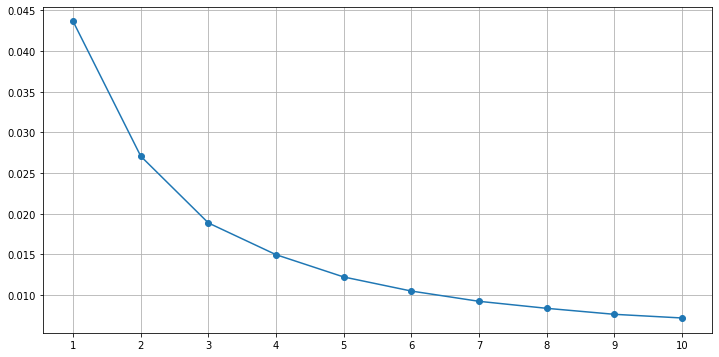

In [121]:
rbSSE = []
for i in range(1,11):
    tmp = cluster.KMeans(n_clusters=i,random_state=10)
    tmp.fit(rbCluster)
    rbSSE.append(tmp.inertia_)
axrb = pd.Series(rbSSE).plot(kind='line',figsize=(12,6),marker='o',grid=True,xticks=range(0,10))
axrb.set(xticklabels=range(1,11))  

- 选择$k=3$

### 聚类

In [113]:
rbkm = cluster.KMeans(n_clusters=3,random_state=10)
rbkm.fit(rbCluster)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=10, tol=0.0001, verbose=0)

In [101]:
rbBar['Cluster'] = rbkm.labels_
rbBar.head()

,Open,High,Low,Close,HO,LO,CO,Cluster
Date,,,,,,,,
2019-12-05 14:15:00,3423.0,3427.0,3422.0,3426.0,1.001169,0.999708,1.000876,2
2019-12-05 14:16:00,3426.0,3428.0,3424.0,3427.0,1.000584,0.999416,1.000292,0
2019-12-05 14:17:00,3428.0,3428.0,3426.0,3426.0,1.000000,0.999417,0.999417,1
2019-12-05 14:18:00,3426.0,3427.0,3425.0,3427.0,1.000292,0.999708,1.000292,0
2019-12-05 14:19:00,3427.0,3428.0,3426.0,3427.0,1.000292,0.999708,1.000000,0


In [114]:
metrics.silhouette_score(rbCluster,rbkm.labels_)

0.4294822728303344

### 可视化展示

Text(0.5, 0, 'High/Open')

Text(0.5, 0, 'Low/Open')

Text(0.5, 0, 'Close/Open')

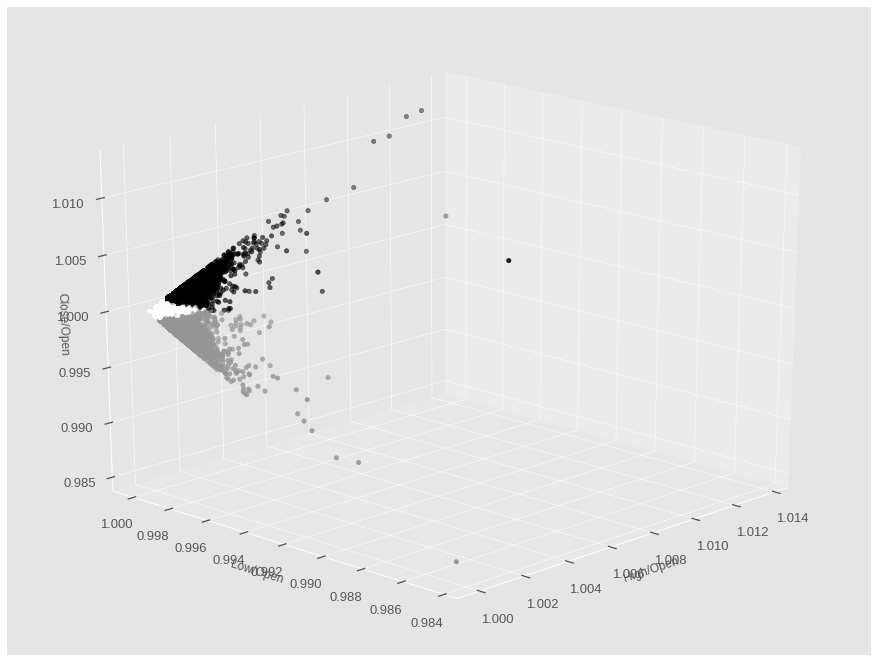

In [137]:
fig = plt.figure(figsize=(12, 9))
ax = Axes3D(fig, elev=21, azim=-136)
ax.scatter(
    rbBar["HO"], rbBar["LO"], rbBar["CO"], 
    c=rbkm.labels_.astype(np.float)
)
ax.set_xlabel('High/Open')
ax.set_ylabel('Low/Open')
ax.set_zlabel('Close/Open')
plt.style.use('seaborn-poster')
plt.show()

# 阅读材料 

- Cavalcante, Rodolfo C., et al. [Computational Intelligence and Financial Markets: A Survey and Future Directions](https://www.sciencedirect.com/science/article/pii/S095741741630029X). Expert Systems with Applications 55 (2016): 194-211
- SARMENTO S M, HORTA N. 2020. Enhancing a Pairs Trading strategy with the application of Machine Learning[J/OL]. Expert Systems with Applications, 158: 113490. https://doi.org/10.1016/j.eswa.2020.113490.


# 课件地址

- 引言 [https://nbviewer.org/github/christinemu/quant-trading/blob/master/QuantIntroduction_EnergyFinance.ipynb](https://nbviewer.org/github/christinemu/quant-trading/blob/master/QuantIntroduction_EnergyFinance.ipynb)
- 交易策略 [https://nbviewer.org/github/christinemu/quant-trading/blob/master/tradingModels-EnergyFinance.ipynb](https://nbviewer.org/github/christinemu/quant-trading/blob/master/tradingModels-EnergyFinance.ipynb)
- 数据驱动交易策略 [https://nbviewer.org/github/christinemu/quant-trading/blob/master/TradingModels-ML-EnergyFinance.ipynb](https://nbviewer.org/github/christinemu/quant-trading/blob/master/TradingModels-ML-EnergyFinance.ipynb)